In [ ]:
# create image path, if the path already exists, skip
from pathlib import Path

# image_path = Path(__file__).resolve().parent() / "images"
image_path = Path("/content/drive/MyDrive/AI6121_Assignment1/images") # adjustable
if image_path.is_dir():
  print("Image path already exists.")
else:
  print("Creating image path...")
  image_path.mkdir(parents=True, exist_ok=True)
  print("Image path created")

Creating image path...
Image path created


In [1]:
# unzip image files to image path
import zipfile

# with zipfile.ZipFile(Path(__file__).resolve().parent() / "sample images.zip", "r") as z:
with zipfile.ZipFile("/content/drive/MyDrive/AI6121_Assignment1/sample images.zip", "r") as z:
  print("Unzipping images")
  z.extractall(image_path)
  print("Images unzipped")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/AI6121_Assignment1/sample images.zip'

# New section

Random image path: /content/drive/MyDrive/AI6121_Assignment1/images/sample04.jpeg


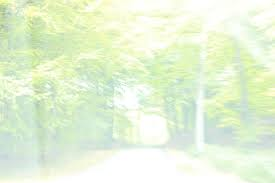

In [ ]:
# visualize a random image within the image folder
import random
from PIL import Image

def see_random_image(image_path_str: str):
  image_path = Path(image_path_str)
  if image_path.is_dir():
    image_path_list = list(image_path.glob("*"))
    random_image_path = random.choice(image_path_list)
    print(f"Random image path: {random_image_path}")
    random_image = Image.open(random_image_path)
    return random_image
  else:
    print("Image path does not exist.")

# see_random_image(Path(__file__).resolve().parent() / "images")
see_random_image("/content/drive/MyDrive/AI6121_Assignment1/images")

In [ ]:
# turn images into torch tensors
from torchvision import transforms

def image_to_tensor(image_path_str: str):
  image_path = Path(image_path_str)
  if image_path.exists:
    image = Image.open(image_path)
    transform = transforms.ToTensor()
    tensor = transform(image)
    return tensor
  else:
    print("Image path does not exist.")
    return None

# image_tensor = image_to_tensor(Path(__file__).resolve().parent() / "images" / "sample01.jpg")
image_tensor = image_to_tensor("/content/drive/MyDrive/AI6121_Assignment1/images/sample01.jpg")
image_tensor.shape
# so it's a colour-channel-first tensor

torch.Size([3, 480, 640])

tensor([[0.8118, 0.8039, 0.7922,  ..., 1.0000, 1.0000, 1.0000],
        [0.8392, 0.8275, 0.8157,  ..., 1.0000, 1.0000, 1.0000],
        [0.8392, 0.8314, 0.8275,  ..., 0.9961, 0.9961, 0.9961],
        ...,
        [0.3961, 0.4392, 0.4902,  ..., 0.9529, 0.9529, 0.9529],
        [0.3608, 0.4314, 0.4353,  ..., 0.9451, 0.9529, 0.9686],
        [0.3608, 0.4157, 0.4118,  ..., 0.9451, 0.9529, 0.9686]])

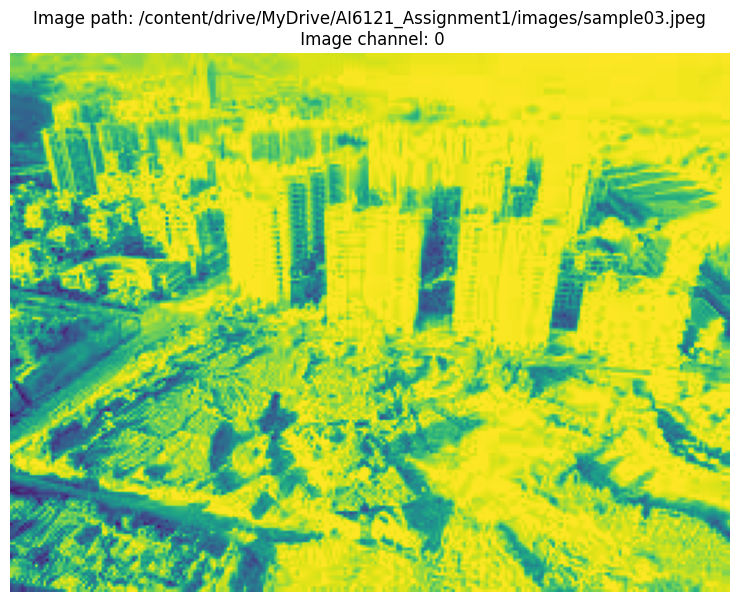

In [ ]:
# select a single colour channel and visualize the image
from matplotlib import pyplot as plt

def see_image_channel(image_path_str: str, channel_number: int=0):
  image_tensor = image_to_tensor(image_path_str)
  if image_tensor is None:
    return None
  else:
    if channel_number not in [0, 1, 2]:
      print("Channel number must be 0, 1 or 2.")
      return None
    else:
      image_channel = image_tensor[channel_number]
      plt.figure(figsize=(10, 7))
      plt.imshow(image_channel)
      plt.title(f"Image path: {image_path_str}\n Image channel: {channel_number}")
      plt.axis("off")
      return image_channel

# see_image_channel(Path(__file__) / "images" / "sample03.jpeg", channel_number=0)
see_image_channel("/content/drive/MyDrive/AI6121_Assignment1/images/sample03.jpeg", channel_number=0)

In [ ]:
! cd /content/drive/MyDrive/AI6121_Assignment1;git add .; git commit -m "Update scripts"; git push origin main

[main 11e38ac] Update scripts
 8 files changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 images/sample01.jpg
 create mode 100644 images/sample02.jpeg
 create mode 100644 images/sample03.jpeg
 create mode 100644 images/sample04.jpeg
 create mode 100644 images/sample05.jpeg
 create mode 100644 images/sample06.jpg
 create mode 100644 images/sample07.jpg
 create mode 100644 images/sample08.jpg
Enumerating objects: 12, done.
Counting objects: 100% (12/12), done.
Delta compression using up to 2 threads
Compressing objects: 100% (11/11), done.
Writing objects: 100% (11/11), 292.11 KiB | 5.41 MiB/s, done.
Total 11 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/XiangKeYiNTU/AI6121_Assignment1.git
   7333613..11e38ac  main -> main


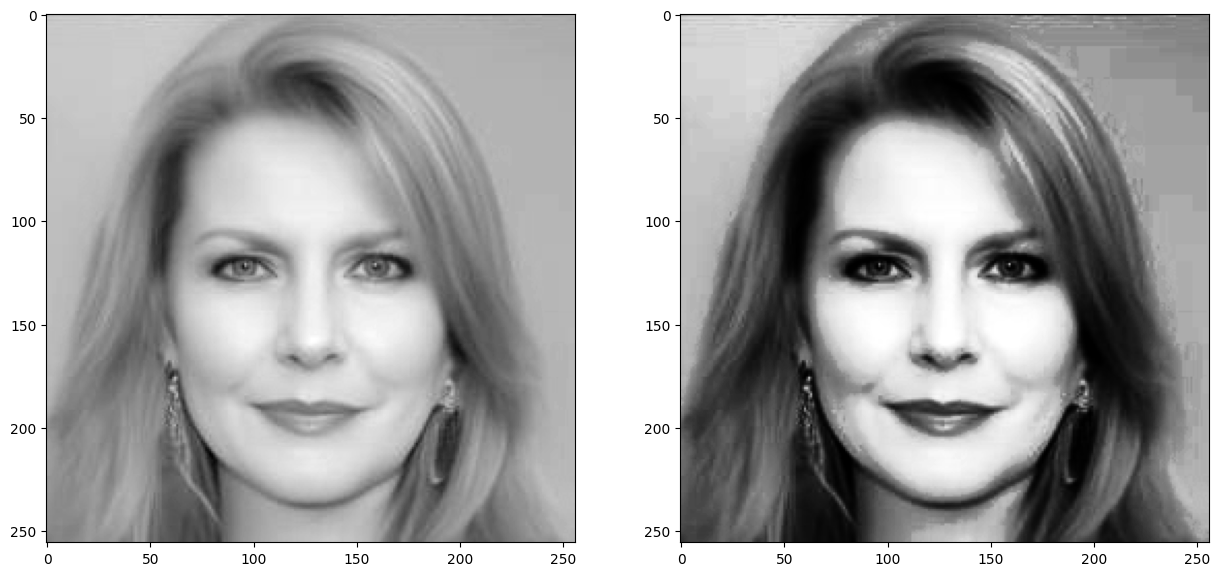

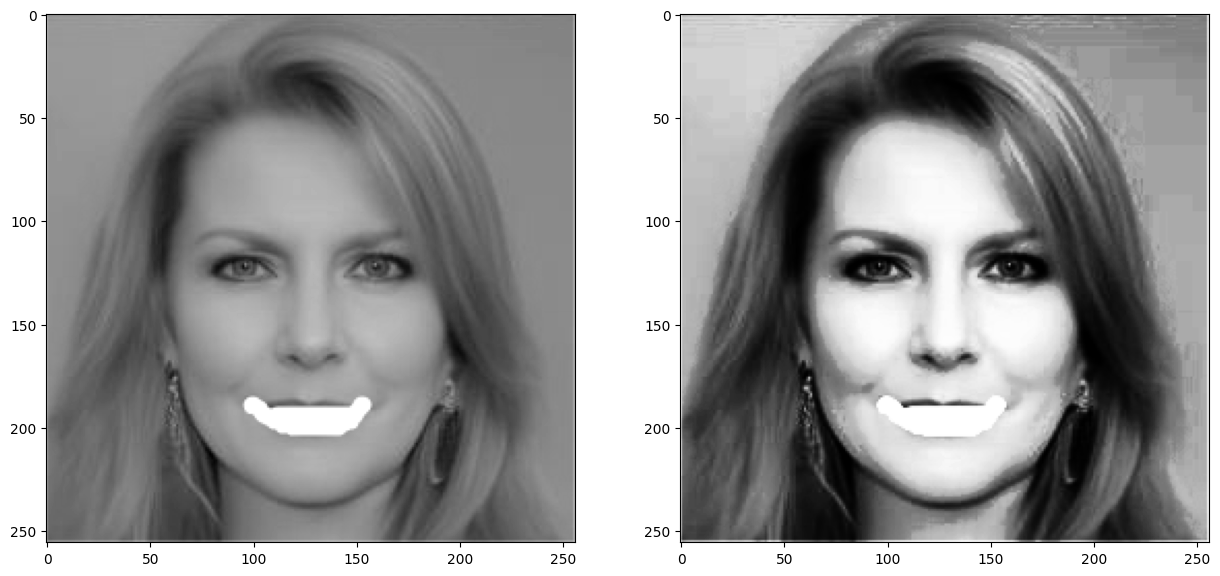

In [14]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

def histogram_equalization(channel, num_bins=256):
    hist, bins = np.histogram(channel.flatten(), num_bins, density=True)
    cdf = hist.cumsum() # cumulative distribution function
    cdf = (num_bins-1) * cdf / cdf[-1] # normalize
    # use linear interpolation of cdf to find new pixel values
    image_equalized = np.interp(channel.flatten(), bins[:-1], cdf)

    return image_equalized.reshape(channel.shape), cdf

def read_img_yuv(image_path):
  image = Image.open(image_path)
  return image.convert('YCbCr')

def get_y_channel(yuv_img):
      yuv_img = np.asarray(yuv_img)
      yuv_img = np.moveaxis(yuv_img, -1, 0)
      return yuv_img[0]

def run_hist_show(img_path):
  img = read_img_yuv(img_path)
  img_y = get_y_channel(img)
  img_new,_  = histogram_equalization(img_y)
  fig = plt.figure()
  fig.set_figheight(15)
  fig.set_figwidth(15)

  fig.add_subplot(1,2,1)
  plt.imshow(img_y, cmap='gray')

  # display the new image
  fig.add_subplot(1,2,2)
  plt.imshow(img_new, cmap='gray')



run_hist_show('smile_neg.png')
run_hist_show('smile_pos.png')




